In [9]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
#PATH = "/content/drive/MyDrive/2022-1/Data Science/term project/pubg-finish-placement-prediction"
PATH =  '/content/gdrive/My Drive/Colab Notebooks/dataset/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set() # setting seaborn default for plots

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [11]:
#train = pd.read_csv(os.path.join(PATH, 'train_V2.csv'))
train = pd.read_csv(PATH + 'train_V2.csv')

# EDA

In [ ]:
# 데이터 찍어보기
train.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.00000,0,0.00000,0,0,244.80000,1,1466,0.44440
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.00450,0,11.04000,0,0,1434.00000,5,0,0.64000
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.00000,0,0.00000,0,0,161.80000,2,0,0.77550
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90000,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.00000,0,0.00000,0,0,202.70000,3,0,0.16670
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53000,1424,solo-fpp,97,95,1560,0,0.00000,0,0.00000,0,0,49.75000,2,0,0.18750


In [ ]:
# gropuId는 한 경기에서 같은 팀인 사람을 구분할 수 있는 피쳐
train[train['groupId'] == '6a4a42c3245a74']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.00000,0,0.00000,0,0,161.80000,2,0,0.77550
3649524,3d588ea15ea8ba,6a4a42c3245a74,110163d8bb94ae,0,3,146.60000,1,0,2,18,0,2,1,10.84000,1318,duo,50,47,1494,0,340.40000,0,0.00000,0,0,1119.00000,2,0,0.77550


In [ ]:
# 총 29개의 column
train.shape

(4446965, 29)

### 데이터의 타입 및 분포 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000,4446965.00000
mean,0.23381,1.10691,130.71717,0.65788,0.22682,1.37015,47.59936,505.00616,0.92478,0.54396,22.99760,1579.50679,44.50468,43.00760,892.01030,0.16466,606.11581,0.00350,4.50932,0.02387,0.00792,1154.21812,3.66049,606.46027,0.47282
std,0.58857,1.71579,170.78063,1.14574,0.60216,2.67998,27.46293,627.50492,1.55844,0.71097,50.97262,258.73881,23.82810,23.28949,736.64779,0.47217,1498.34365,0.07337,30.50220,0.16739,0.09261,1183.49705,2.45654,739.70047,0.30740
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,133.00000,2.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,1367.00000,28.00000,27.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,155.10000,2.00000,0.00000,0.20000
50%,0.00000,0.00000,84.24000,0.00000,0.00000,0.00000,47.00000,0.00000,0.00000,0.00000,0.00000,1438.00000,30.00000,30.00000,1443.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,685.60000,3.00000,0.00000,0.45830
75%,0.00000,2.00000,186.00000,1.00000,0.00000,2.00000,71.00000,1172.00000,1.00000,1.00000,21.32000,1851.00000,49.00000,47.00000,1500.00000,0.00000,0.19100,0.00000,0.00000,0.00000,0.00000,1976.00000,5.00000,1495.00000,0.74070
max,22.00000,33.00000,6616.00000,53.00000,64.00000,80.00000,101.00000,2170.00000,72.00000,20.00000,1094.00000,2237.00000,100.00000,100.00000,5910.00000,39.00000,40710.00000,18.00000,3823.00000,12.00000,5.00000,25780.00000,236.00000,2013.00000,1.00000


Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')


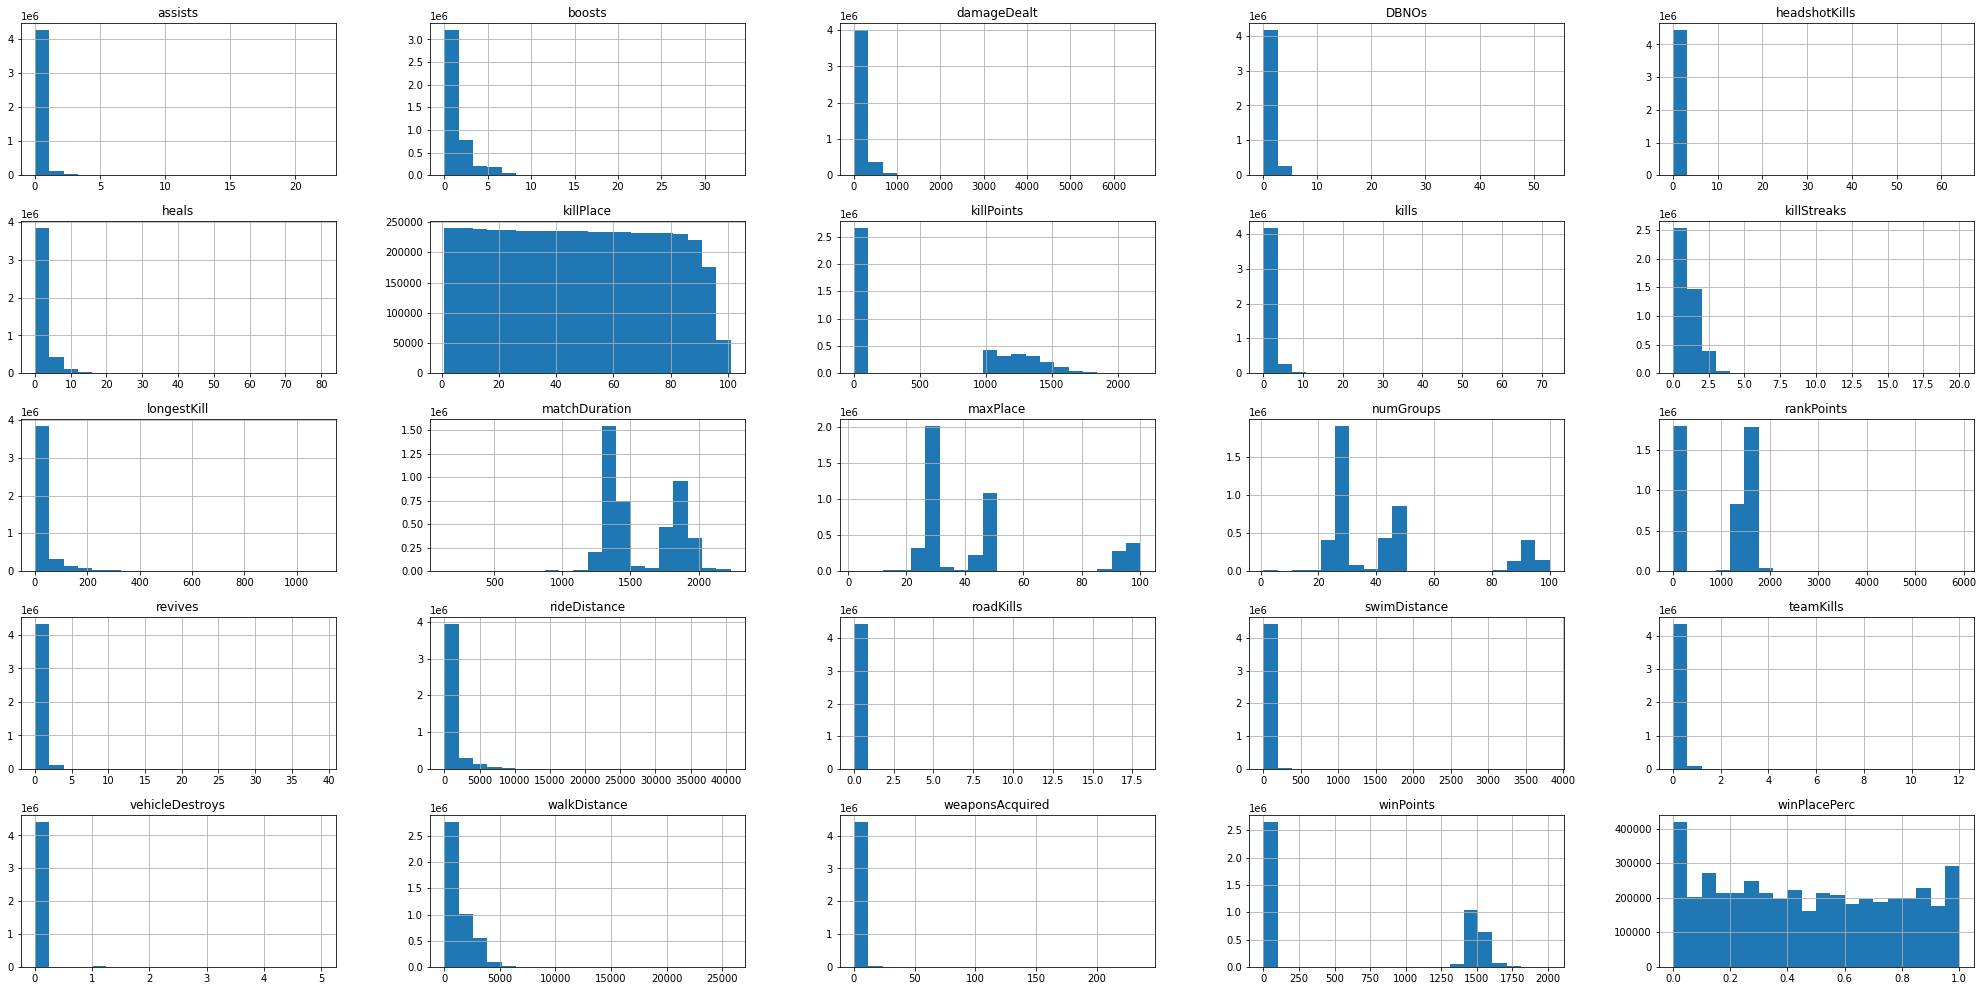

In [ ]:
cols_list = train.columns[1:]
print(cols_list)

train[cols_list].hist(figsize=(35, 21), grid=True, layout=(6,5), bins=20)
plt.show()

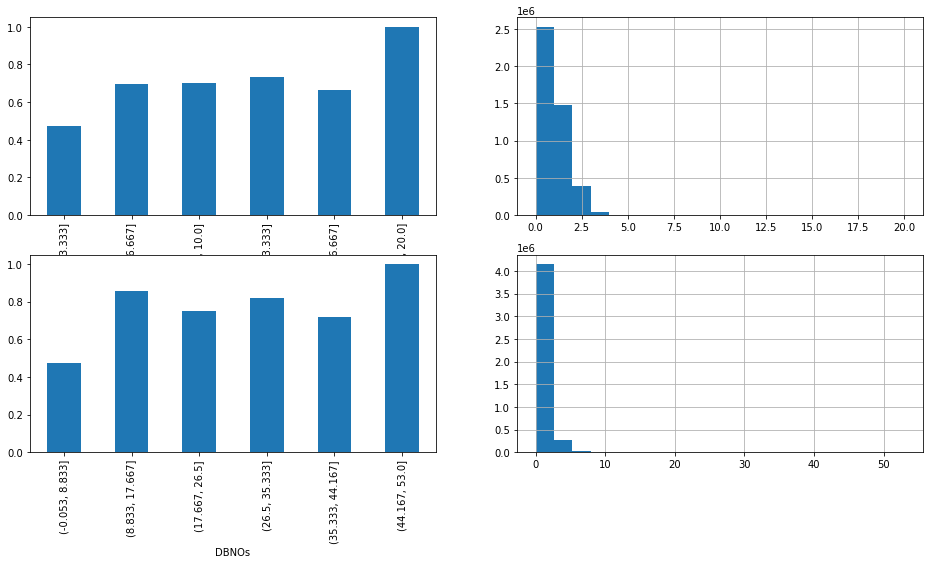

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

cols = ['killStreaks','DBNOs']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

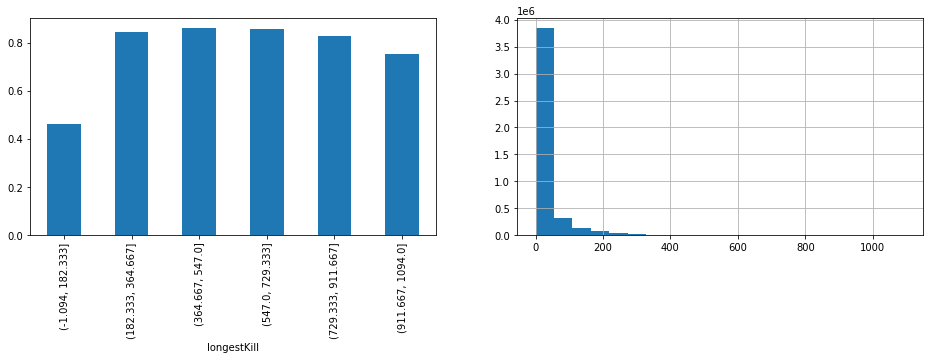

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

col = 'longestKill'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

### 피쳐간 상관관계 확인

In [ ]:
num_cols = ['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'matchType', 'winPlacePerc']

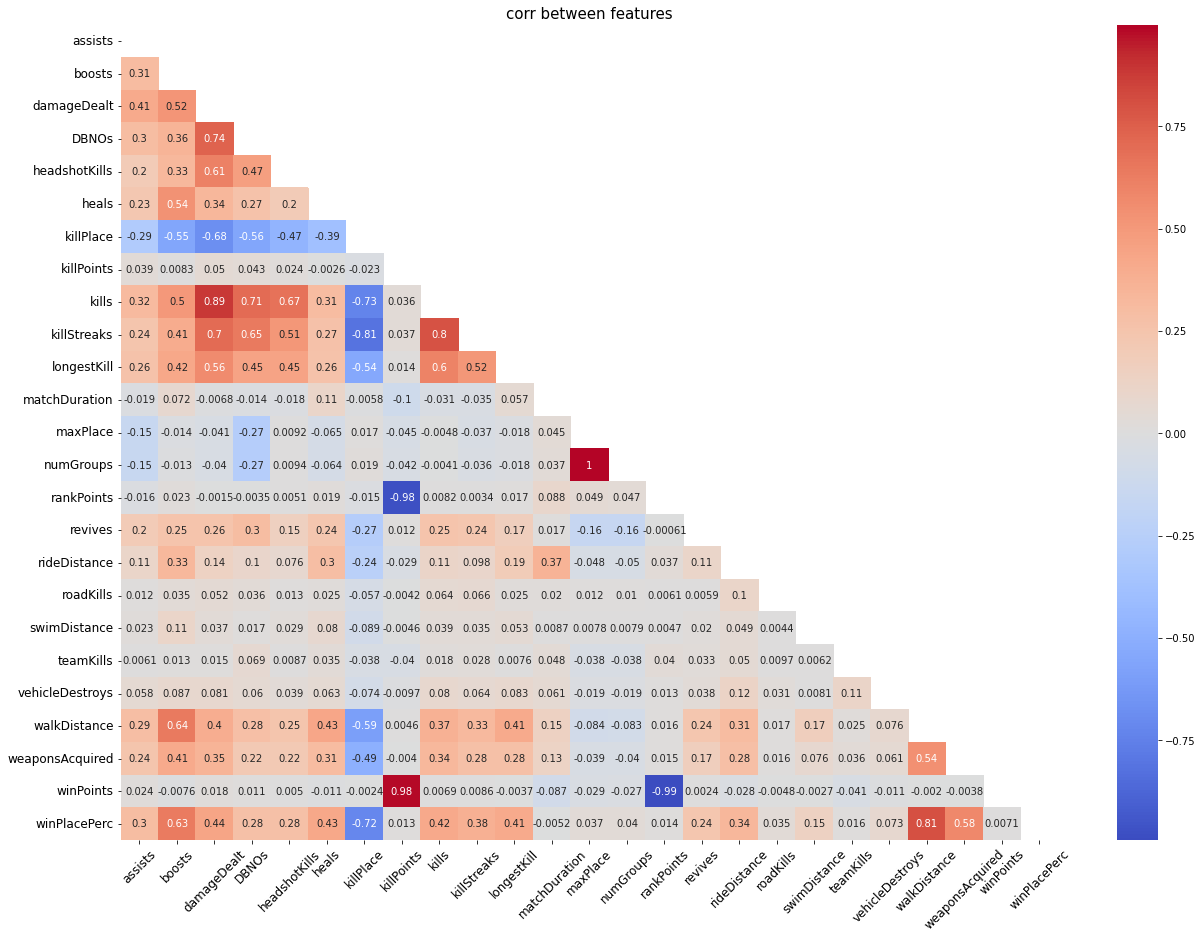

In [ ]:
def corr_heat(df):
  plt.figure(figsize=(21, 15))

  corr_df = df.corr()
  # display(corr_df)

  mask = np.zeros_like(corr_df)
  mask[np.triu_indices_from(mask)] = 1
  heat_map = sns.heatmap(corr_df, annot=True, mask=mask, cmap='coolwarm')
  heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
  heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
  plt.title('corr between features', fontsize=15)
  plt.show()

corr_heat(train[num_cols])

# MAE

In [ ]:
from sklearn.metrics import mean_absolute_error

def print_score(m : RandomForestRegressor, trnx,trny,tstx,tsty):
    res = ['mae train: ', mean_absolute_error(m.predict(trnx), trny), 
           'mae val: ', mean_absolute_error(m.predict(tstx), tsty)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# 1. 기본적인 전처리

### 결측치 확인 및 제거

In [12]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
winPlacePerc,1,0.000022
matchType,0,0.000000
winPoints,0,0.000000
weaponsAcquired,0,0.000000
walkDistance,0,0.000000
vehicleDestroys,0,0.000000
teamKills,0,0.000000
swimDistance,0,0.000000
roadKills,0,0.000000
rideDistance,0,0.000000


In [13]:
train.dropna(inplace=True)

### 카테고리 변수 인코딩

In [14]:
label_encoder = LabelEncoder()

In [15]:
train['matchType'] = label_encoder.fit_transform(train['matchType'])
train['groupId'] = label_encoder.fit_transform(train['groupId'])
train['matchId'] = label_encoder.fit_transform(train['matchId'])

In [16]:
# index와 똑같은 
train1 = train.drop(columns = ['Id'])

### 검증 데이터 준비

In [17]:
X = train1.drop(['winPlacePerc','damageDealt', 'maxPlace', 'matchDuration', 'kills'], axis=1)
y = train1['winPlacePerc']

In [18]:
trnx, tstx, trny, tsty = train_test_split(X, y, test_size=.3, random_state=634)

###Multi Layer Perceptron

In [32]:
from tensorflow.keras import layers, models, optimizers
from keras.models import Sequential

model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(trnx.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               3072      
                                                                 
 dense_26 (Dense)            (None, 256)               33024     
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 77,313
Trainable params: 77,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mae', optimizer="Adam", metrics=['mae'])
history = model.fit(trnx, trny, batch_size=3000,  epochs=100, validation_data = [tstx,tsty])

Epoch 1/100
1038/1038 [==============================] - 47s 45ms/step - loss: 932.8473 - mae: 932.8473 - val_loss: 242.5538 - val_mae: 242.5538
Epoch 2/100
1038/1038 [==============================] - 42s 41ms/step - loss: 78.8563 - mae: 78.8563 - val_loss: 0.3364 - val_mae: 0.3364
Epoch 3/100
1038/1038 [==============================] - 43s 41ms/step - loss: 0.3017 - mae: 0.3017 - val_loss: 0.2880 - val_mae: 0.2880
Epoch 4/100
1038/1038 [==============================] - 43s 41ms/step - loss: 0.2929 - mae: 0.2929 - val_loss: 0.2894 - val_mae: 0.2894
Epoch 5/100
1038/1038 [==============================] - 43s 41ms/step - loss: 0.2909 - mae: 0.2909 - val_loss: 0.2880 - val_mae: 0.2880
Epoch 6/100
1038/1038 [==============================] - 45s 43ms/step - loss: 0.2855 - mae: 0.2855 - val_loss: 0.2830 - val_mae: 0.2830
Epoch 7/100
1038/1038 [==============================] - 43s 41ms/step - loss: 0.2823 - mae: 0.2823 - val_loss: 0.2762 - val_mae: 0.2762
Epoch 8/100
1038/1038 [========

KeyboardInterrupt: ignored

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Linear Regression

In [ ]:
model_linear_basic = LinearRegression()
model_linear_basic.fit(trnx, trny)

LinearRegression()

In [ ]:
model_linear_basic.score(tstx, tsty)

0.8127187418176494

In [ ]:
print_score(model_linear_basic, trnx, trny, tstx, tsty)

['mae train: ', 0.09724406644985442, 'mae val: ', 0.097375146379088]


### Random Forest Regresssion

In [ ]:
# Train basic model
model_RF_basic = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model_RF_basic.fit(trnx, trny)
# print_score(m1)
model_RF_basic.score(tstx, tsty)

0.9132063617052107

In [ ]:
print_score(model_RF_basic, trnx, trny, tstx, tsty)

['mae train: ', 0.0361831000374244, 'mae val: ', 0.06385080745220131]


# 2.정규화

In [ ]:
train2 = train.drop(columns = ['Id'])

In [ ]:
train2['playersJoined'] = train2.groupby('matchId')['matchId'].transform('count')

In [ ]:
# 정규화 feature 생성
def normalization(X):
  X['killsNorm'] = X['kills']*((100-X['playersJoined'])/100 + 1)
  X['damageDealtNorm'] = X['damageDealt']*((100-X['playersJoined'])/100 + 1)
  X['maxPlaceNorm'] = X['maxPlace']*((100-X['playersJoined'])/100 + 1)
  X['matchDurationNorm'] = X['matchDuration']*((100-X['playersJoined'])/100 + 1)
  return X

In [ ]:
train2 = normalization(train2)

### 검증 데이터 준비

In [ ]:
X = train2.drop(['winPlacePerc','damageDealt', 'maxPlace', 'matchDuration', 'kills', 'playersJoined'], axis=1)
y = train2['winPlacePerc']

In [ ]:
trnx, tstx, trny, tsty = train_test_split(X, y, test_size=.3, random_state=634)

### Linear Regression

In [ ]:
model_linear_normal = LinearRegression()
model_linear_normal.fit(trnx, trny)

LinearRegression()

In [ ]:
model_linear_normal.score(tstx, tsty)

0.83968124463687

In [ ]:
print_score(model_linear_normal, trnx, trny, tstx, tsty)

['mae train: ', 0.08960053775803481, 'mae val: ', 0.08973739291885947]


### Random Forest Regresssion

In [ ]:
# Train normalization model
model_RF_normal = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model_RF_normal.fit(trnx, trny)
# print_score(m1)
model_RF_normal.score(tstx, tsty)

0.9339098357235169

In [ ]:
print_score(model_RF_normal, trnx, trny, tstx, tsty)

['mae train: ', 0.029774917222944005, 'mae val: ', 0.05562307234438658]


# 3. 새로운 피쳐 추가 및 이상치 제거

In [ ]:
train3 = train.drop(columns = ['Id'])

### 피쳐 추가하기

In [ ]:
def add_player_features(X):
    X['headshot_rate'] = X['headshotKills'] / (X['kills'] + 0.00001)
    X['kill_streak_rate'] = X['killStreaks'] / (X['kills'] + 0.00001)
    X['kills_assists'] = X['kills'] + X['assists']
    X['heals_boosts'] = X['heals'] + X['boosts']
    X['total_distance'] = X['walkDistance'] + X['rideDistance'] + X['swimDistance']
    X['items_per_matchDuration'] = X['heals_boosts'] / X ['matchDuration']
    X['totalDistance_per_matchDuration'] = X['total_distance'] / X['matchDuration']
    X['killPlace'] = X['killPlace'] - 1
    X['playersJoined'] = X.groupby('matchId')['matchId'].transform('count')
    return X

In [ ]:
train3 = add_player_features(train3)

### 이상치 제거

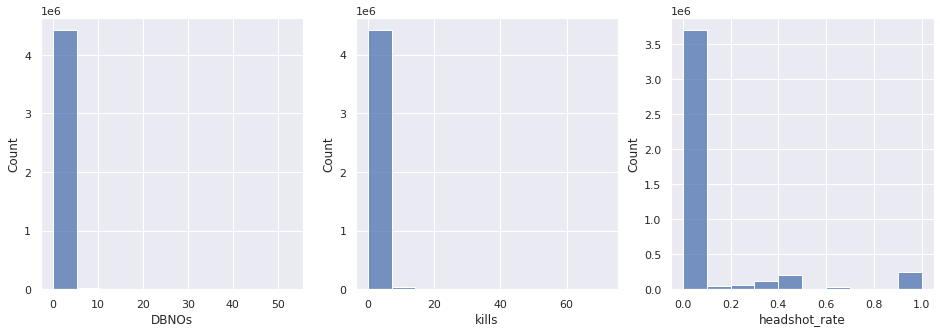

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(train['DBNOs'], bins=10, ax=axes[0])
sns.histplot(train['kills'], bins=10, ax=axes[1])
sns.histplot(train3['headshot_rate'], bins=10, ax=axes[2])

<Figure size 864x288 with 0 Axes>

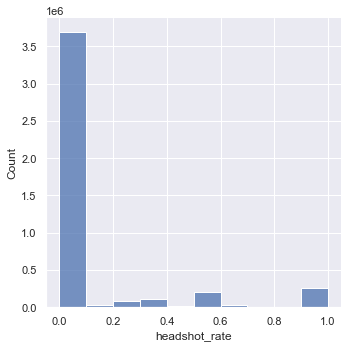

In [ ]:
plt.figure(figsize=(12,4))
sns.displot(train['headshot_rate'], bins=10)
plt.show()

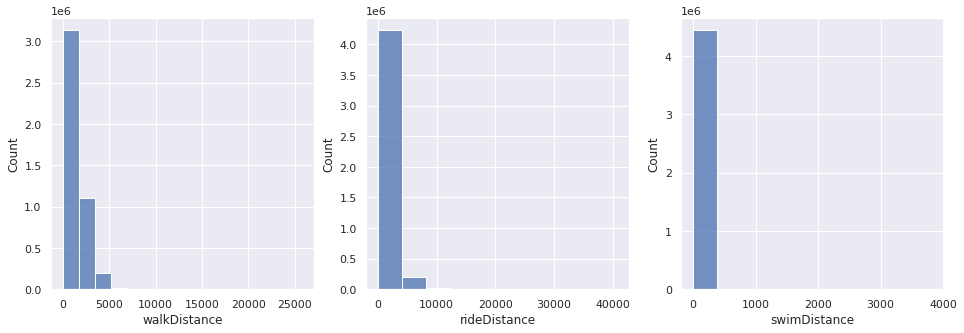

In [ ]:
# Plot the distribution of Distance
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(train['walkDistance'], bins=15, ax=axes[0])
sns.histplot(train['rideDistance'], bins=10, ax=axes[1])
sns.histplot(train['swimDistance'], bins=10, ax=axes[2])


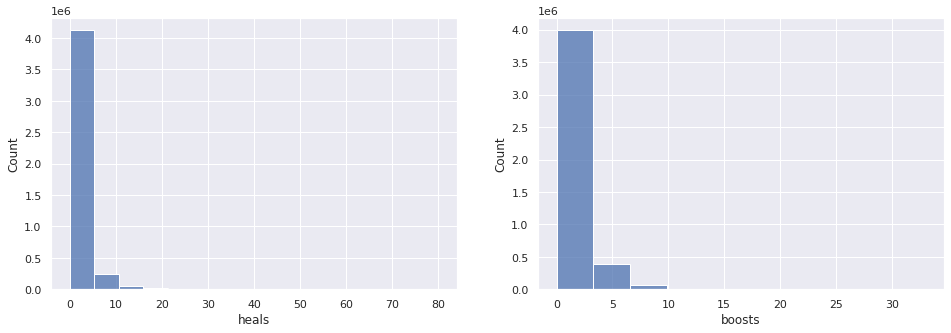

In [ ]:
# Distribution of heals
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(train['heals'], bins=15, ax=axes[0])
sns.histplot(train['boosts'], bins=10, ax=axes[1])


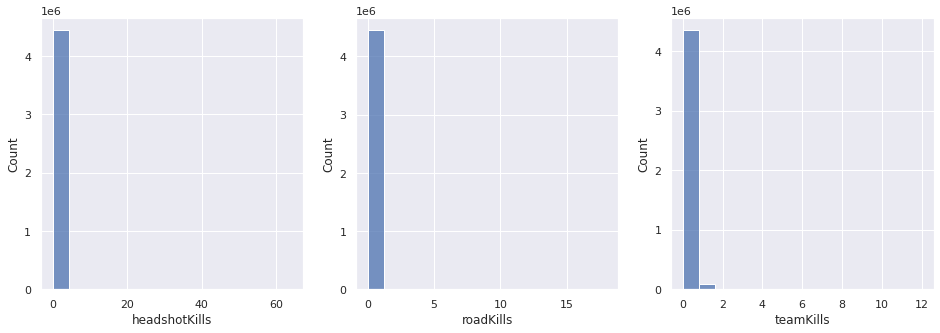

In [ ]:
# Plot the distribution of Distance
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(train['headshotKills'], bins=15, ax=axes[0])
sns.histplot(train['roadKills'], bins=15, ax=axes[1])
sns.histplot(train['teamKills'], bins=15, ax=axes[2])


In [ ]:
def remove_outliers(X):
    outliers = (X['DBNOs'] >= 30) | (X['headshotKills'] > 30) | ((X['kills'] > 0) & (X['total_distance'] == 0))
    outliers = outliers | (X['kills'] > 30) | (X['revives'] > 15) | (X['longestKill'] >= 1000) | (X['weaponsAcquired'] >= 80) | (X['headshot_rate'] == 1) & (X['kills'] > 8)
    outliers = outliers | (X['roadKills'] >= 8) | (X['teamKills'] > 8) | (X['walkDistance'] > 10000) | (X['rideDistance'] >= 20000) | (X['swimDistance'] >= 2000)
    X = X.loc[~outliers]
    outlier_data = X.loc[outliers]
    return X, outlier_data

In [ ]:
display(train2[train2['roadKills'] >= 8].shape)
train2[train2['roadKills'] >= 8].head(10)

In [ ]:
train2, _ = remove_outliers(train2)

In [ ]:
train2.head()

### 검증 데이터 준비

In [ ]:
X = train2.drop(['winPlacePerc','damageDealt', 'maxPlace', 'matchDuration', 'kills'], axis=1)
y = train2['winPlacePerc']

In [ ]:
trnx, tstx, trny, tsty = train_test_split(X, y, test_size=.3, random_state=634)

### Linear Regression

In [ ]:
model_linear_final = LinearRegression()
model_linear_final.fit(trnx, trny)

LinearRegression()

In [ ]:
model_linear_final.score(tstx, tsty)

0.8593354234164107

In [ ]:
print_score(model_linear_final, trnx, trny, tstx, tsty)

['mae train: ', 0.08256787812778393, 'mae val: ', 0.08249980683320592]


### Random Forest Regresssion

In [ ]:
# Train final model
model_RF_final = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model_RF_final.fit(trnx, trny)
# print_score(m1)
model_RF_final.score(tstx, tsty)

0.9338034183726611

In [ ]:
print_score(model_RF_final, trnx, trny, tstx, tsty)

['mae train: ', 0.029253877749687747, 'mae val: ', 0.05567705498534771]
